In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
#read data using panda
train = pd.read_csv("titanic_train.csv")
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [52]:
# EDA
# Find missing data

train.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

<AxesSubplot:>

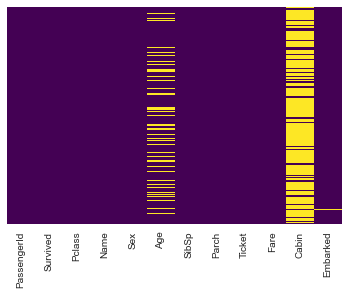

In [53]:
# use seaborn's heatmap instead to find the null values/missing data in which tables
sns.heatmap(train.isnull(), yticklabels=False, cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

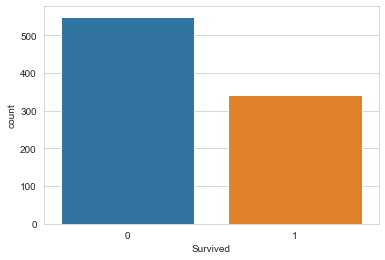

In [54]:
# gathering info on Survival rate
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

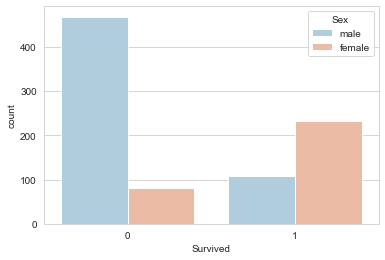

In [55]:
# Further finding the survival rate based on gender
sns.countplot(x = 'Survived', hue = 'Sex', data = train, palette = 'RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

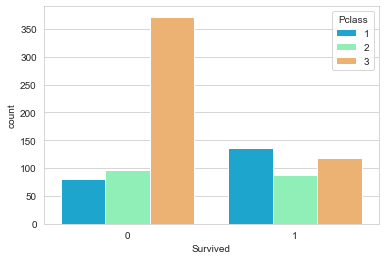

In [56]:
#finding relation between Survival rate and passenger class

sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = 'rainbow')

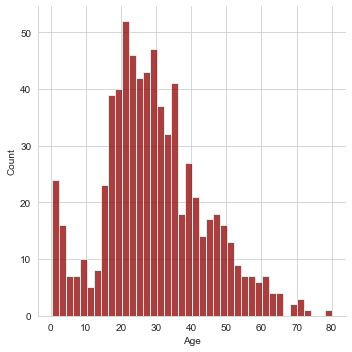

In [57]:
# explore more info
# find the age distribution; used to find mean age, use histogram to find the frequency of the elements aka age
# use displot or histplot
# dropna = drop NaN values
# kde is used manily for probability density

sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins = 40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

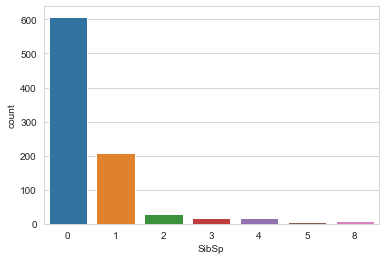

In [58]:
sns.countplot(x = 'SibSp', data = train)

<AxesSubplot:>

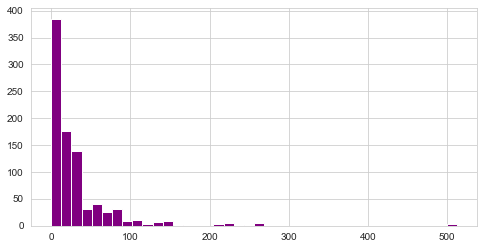

In [59]:
train['Fare'].hist(color = 'purple', bins = 40, figsize = (8,4))

DATA CLEANING

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

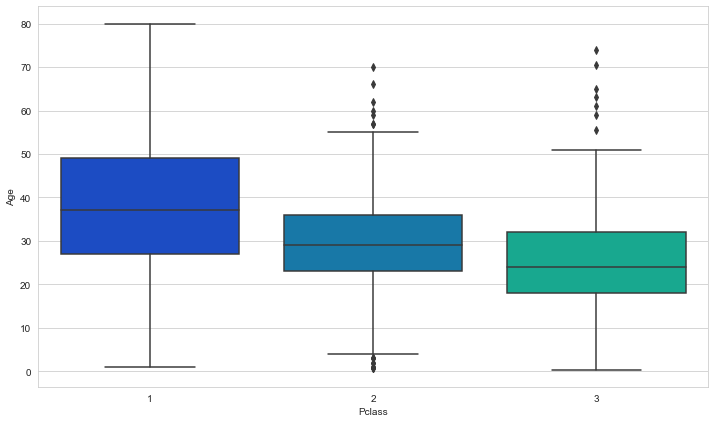

In [60]:
# fill in the missing age (later cabin) rather than getting rid of it
# find a relation between passenger class and avg age and replace the null age of the diff passenger class with their respective mean age

plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'winter')

In [61]:
# function to replace the NaN age

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [62]:
#apply the function to the dataset
train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

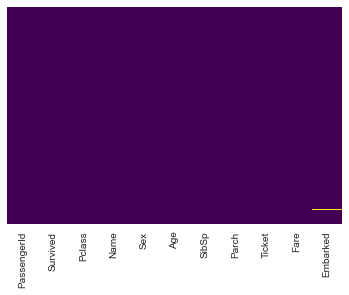

In [63]:
#check heatmap
# dropping Cabin  and the few rows of Embarked because it requires Feature Engineering
train.drop('Cabin', axis = 1, inplace = True)
#train.dropna(inplace = True)
train.head()
sns.heatmap(train.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [64]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [65]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [66]:
# excluding categories which aren't needed - Passenger ID, Name, Ticket
# Sex and Embarked categories should be made int using get_dummies

pd.get_dummies(train['Embarked'],drop_first = True).head()


Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [67]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [68]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'],axis = 1, inplace = True)
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

In [69]:
# add the new categories sex and embark
train = pd.concat([train,sex,embark], axis=1)
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

Building a logistic regression model
`

In [71]:
# Train Test Split
# 
# 
# Survived = dependent
# Rest of the columns = independent

train.drop('Survived', axis = 1).head()

PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1       3  22.0      1      0   7.2500     1  0  1
1            2       1  38.0      1      0  71.2833     0  0  0
2            3       3  26.0      0      0   7.9250     0  0  1
3            4       1  35.0      1      0  53.1000     0  0  1
4            5       3  35.0      0      0   8.0500     1  0  1

In [72]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30, random_state=101)

In [78]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [80]:
predictions = logmodel.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix

In [84]:
accuracy=confusion_matrix(y_test,predictions)

In [85]:
accuracy

array([[134,  20],
       [ 37,  77]], dtype=int64)

In [88]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,predictions)
accuracy

0.7873134328358209

In [89]:
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

EVALUATION


In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268

